In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Video%20Game%20Sales/vgsales.csv")

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


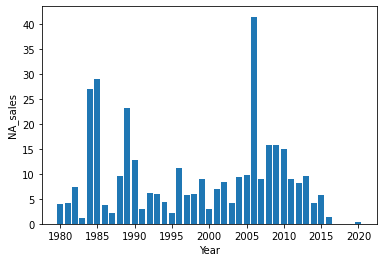

In [5]:
plt.bar(df.Year, df.NA_Sales)
plt.xlabel("Year")
plt.ylabel("NA_sales")
plt.show()

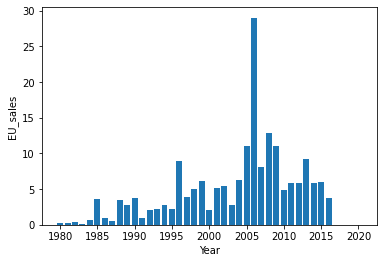

In [6]:
plt.bar(df.Year, df.EU_Sales)
plt.xlabel("Year")
plt.ylabel("EU_sales")
plt.show()

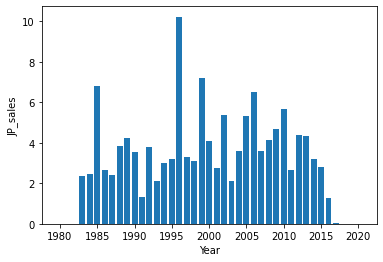

In [7]:
plt.bar(df.Year, df.JP_Sales)
plt.xlabel("Year")
plt.ylabel("JP_sales")
plt.show()

In [8]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [9]:
df["Publisher"].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [10]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

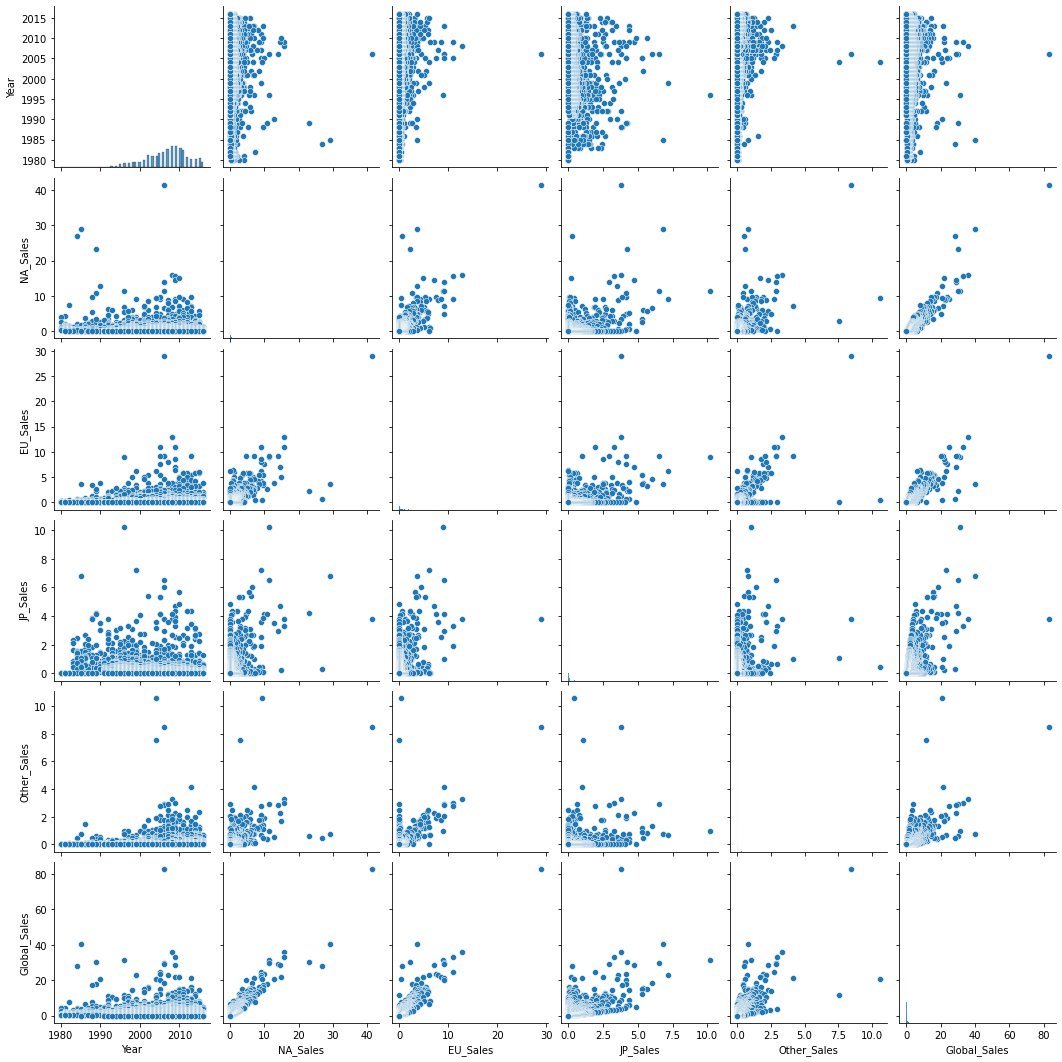

In [11]:
df.dropna(inplace=True)
df.drop(df[df['Year']>2016].index, inplace=True)
df = df.set_index('Rank')
sns.pairplot(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16287 non-null  object 
 1   Platform      16287 non-null  object 
 2   Year          16287 non-null  float64
 3   Genre         16287 non-null  object 
 4   Publisher     16287 non-null  object 
 5   NA_Sales      16287 non-null  float64
 6   EU_Sales      16287 non-null  float64
 7   JP_Sales      16287 non-null  float64
 8   Other_Sales   16287 non-null  float64
 9   Global_Sales  16287 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [13]:
df.nunique()

Name            11322
Platform           31
Year               37
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

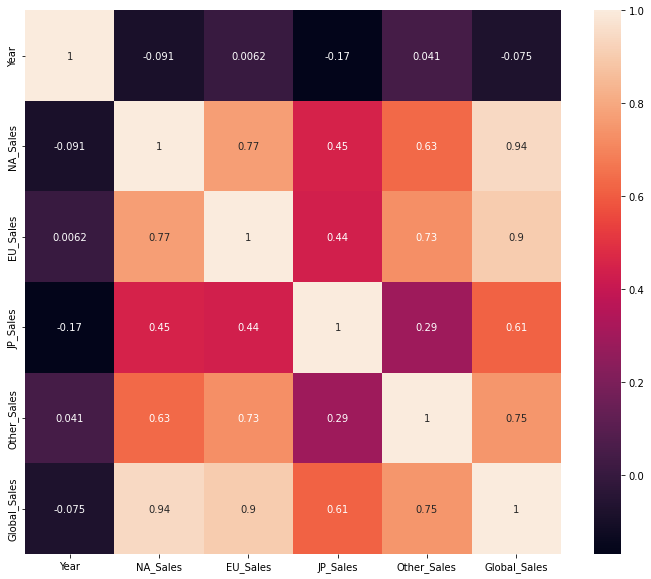

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
top5 = df.sort_values('Global_Sales', ascending=False).head()
top5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


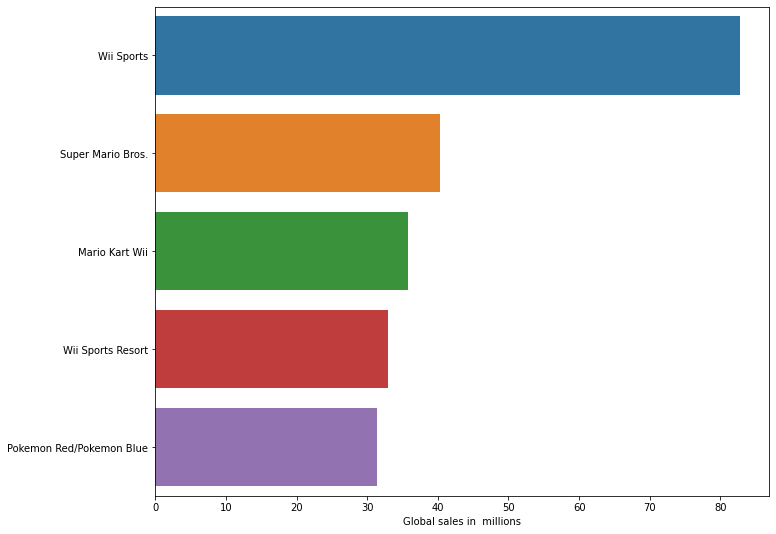

In [16]:
plt.figure(figsize=(11,9))
sns.barplot(y=top5.Name, x=top5.Global_Sales)
plt.xlabel('Global sales in  millions')
plt.ylabel('')
plt.show()

In [17]:
top_pub = df['Publisher'].value_counts()
top_pub10 = top_pub.head(10)
top_pub10

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [18]:
pub_sales = df.groupby('Publisher').sum().sort_values(by = 'Global_Sales', ascending=False)['Global_Sales'].head(10)
pub_sales

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.66
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

In [19]:
platforms = df['Platform'].value_counts()
platforms = platforms.head(5)
sum_platform = df.groupby('Platform').sum().sort_values(by = 'Global_Sales', ascending=False)['Global_Sales'].head(5)
sum_platform

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.62
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'top 5 platforms')

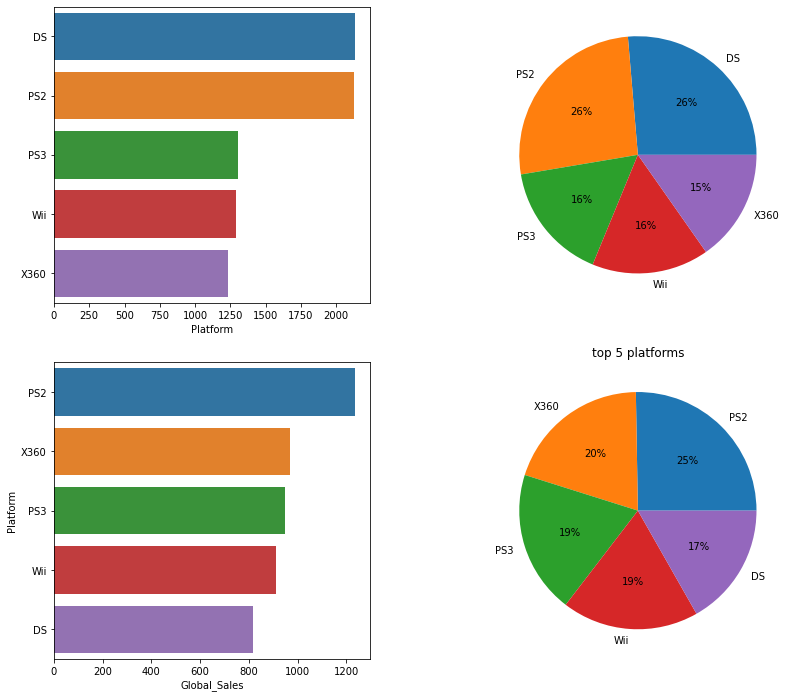

In [20]:
fig, ax = plt.subplots(2,2, figsize=(14,12), gridspec_kw = dict(width_ratios=[4,5]))
sns.barplot(y=platforms.index, x=platforms, ax=ax[0,0])
plt.title("top 5 platforms")
ax[0,1].pie(platforms, labels=platforms.index, autopct="%.0f%%")
plt.title("top 5 platforms")

sns.barplot(y=sum_platform.index, x=sum_platform, ax=ax[1,0])
plt.title("top 5 platforms")
ax[1,1].pie(sum_platform, labels=sum_platform.index, autopct="%.0f%%")
plt.title("top 5 platforms")

In [21]:
genre = df['Genre'].value_counts()
genre

Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [22]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum()
genre_sales

Genre
Action          1722.83
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.79
Shooter         1026.20
Simulation       389.69
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64

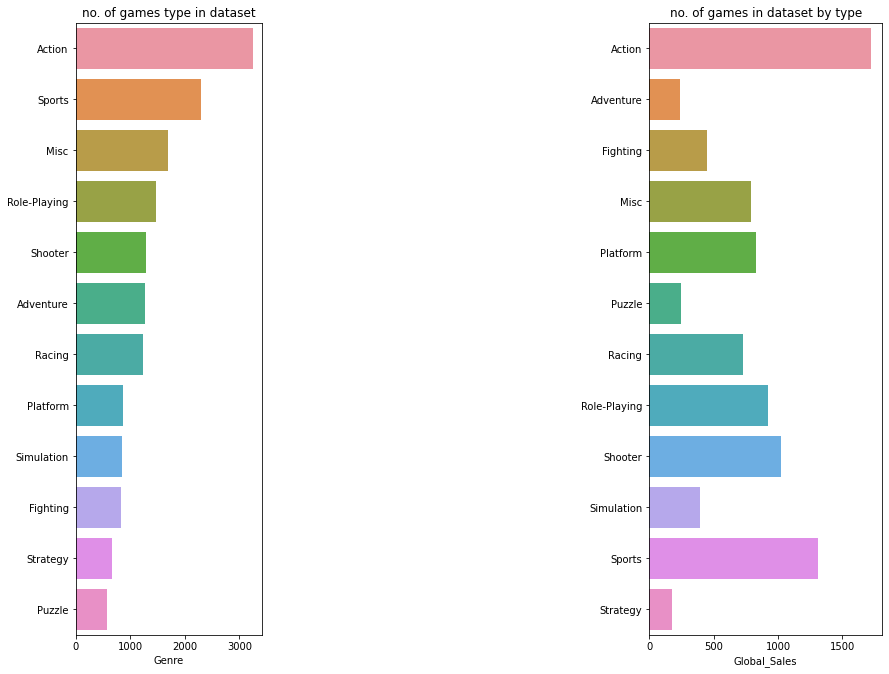

In [23]:
fix, ax = plt.subplots(1,2,figsize=(14,10), gridspec_kw=dict(width_ratios=[4,5]))
sns.barplot(y=genre.index, x=genre, ax=ax[0])
ax[0].set_title("no. of games type in dataset")
plt.xlabel('Amount of games by type')

sns.barplot(y=genre_sales.index, x=genre_sales, ax=ax[1])
ax[1].set_title("no. of games in dataset by type")
plt.ylabel('')
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.9, wspace=1.85, hspace=0.35)
plt.show()

In [24]:
year = df.groupby('Year')['NA_Sales','JP_Sales','EU_Sales','Other_Sales'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


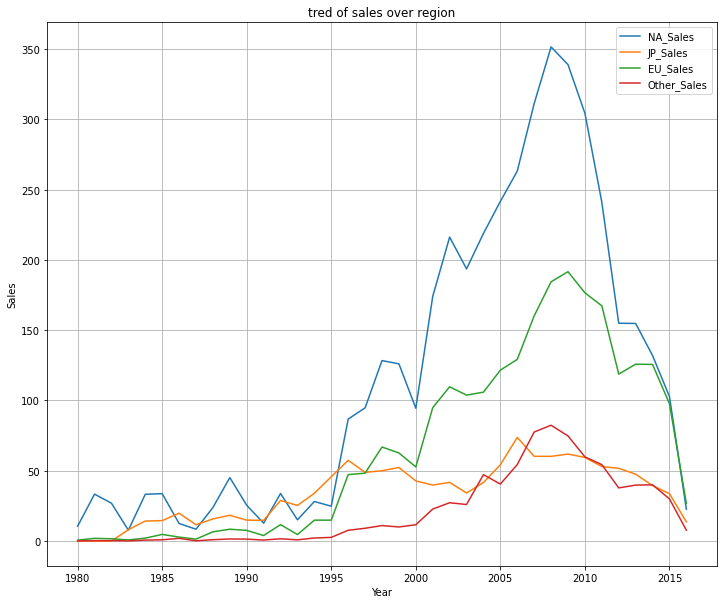

In [25]:
year.plot(figsize=(12,10))
plt.title('tred of sales over region')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [26]:
gameofyear = df[df.groupby('Year')['Global_Sales'].transform(max)==df['Global_Sales']]
gameofyear = gameofyear.set_index('Year').sort_values(by='Year')
gameofyear

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,
1980.0,Asteroids,2600,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1981.0,Pitfall!,2600,Platform,Activision,4.21,0.24,0.00,0.05,4.50
1982.0,Pac-Man,2600,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81
1983.0,Baseball,NES,Sports,Nintendo,0.73,0.10,2.35,0.02,3.20
1984.0,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1986.0,The Legend of Zelda,NES,Action,Nintendo,3.74,0.93,1.69,0.14,6.51
1987.0,Zelda II: The Adventure of Link,NES,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
1988.0,Super Mario Bros. 3,NES,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
